# Módulo II - mini projeto 2 - Visualização de Dados

O projeto pode ser feito em até 4 integrantes

EUGENIO VENTURA

Para a entrega, coloque o notebook respondido no seu github (um por grupo) ou, em último caso, salvar o notebook e enviar via chat do class.

Usando os dados do mini projeto 1 com algumas colunas acrescentadas

Arquivo: investidores.csv

Colunas extras:
- Reserva: Valor da reserva de emergência
- Invest_curto_prazo, Invest_longo_prazo, Invest_medio_prazo : investimento disponível a curto, médio e longo prazo de cada investidor
- Total: total já investido (soma das colunas de ativos para cada investidor)

Responda cada item graficamente. Você pode usar o matplotlib, gráfico do pandas, seaborn ou plotly.

O projeto contém 3 bônus, que são opcionais


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('investidores.csv')

df.head()

,id,Nome,Sexo,idade,Email,Job,Estado,Renda,Perfil,Ativo01,...,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Total,Reserva,Invest_curto_prazo,Invest_medio_prazo,Invest_longo_prazo
0,id0000002,Sebastião Castelo Branco Júnior,Masc,33,barnesandrea@yahoo.com,"Biochemist, clinical",DF,21.96,Moderado,842.12,...,3336.07,14052.91,5624.22,2669.980,504.17,18622.65,22.6188,26.352,35.136,39.528
1,id0000003,Romildo Fábio de Carvalho,Masc,40,walkermichael@yahoo.com,"Development worker, international aid",DF,62497.64,Conservador,818.81,...,3396.64,14052.91,5033.83,2229.450,523.12,17518.37,64372.5692,124995.280,99996.224,99996.224
2,id0000004,Lana Albina de Lemos Mumy,Fem,51,cobbangela@hotmail.com,Estate manager/land agent,DF,99878.74,Agressivo,1095.92,...,3723.10,14052.91,5933.91,2270.165,486.05,15401.75,102875.1022,199757.480,199757.480,299636.220
3,id0000005,Rose Elisângela Vyrnium de Moura,Fem,39,crawfordcraig@yahoo.com,Chartered public finance accountant,MS,188.01,Conservador,1505.16,...,3462.67,30841.35,6044.86,2198.890,512.98,50981.21,193.6503,225.612,225.612,282.015
4,id0000006,Osório Mário de Parreira Sassoer Otremo,Masc,60,ramirezjennifer@yahoo.com,Press sub,MS,375.93,Conservador,858.43,...,3097.11,13431.14,4409.81,2270.165,492.03,24820.16,387.2079,451.116,676.674,563.895


## 1) Faça um gráfico para ver a distribuição da idade dos investidores
dica: histograma

Text(-0.16499999999999915, 0.5, 'Frequência')

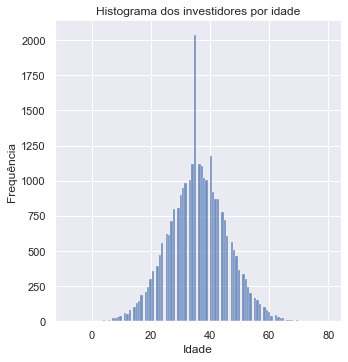

In [3]:
sns.displot(data = df['idade'], kind = 'hist')
plt.title('Histograma dos investidores por idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

## 2) Faça um gráfico de pizza para ver a distribuição dos perfis dos investidores
Coloque o valor das porcentagens e a legenda  
dica: usar value_counts() 

Text(0.5, 1.0, 'Distribuição dos investidores por perfil')

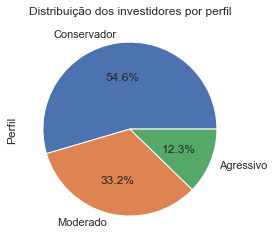

In [4]:
df['Perfil'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribuição dos investidores por perfil')

## 3) Faça um gráfico de barras verticais da quantidade de investidores por estado
dica: usar value_counts() ou groupby

<AxesSubplot:>

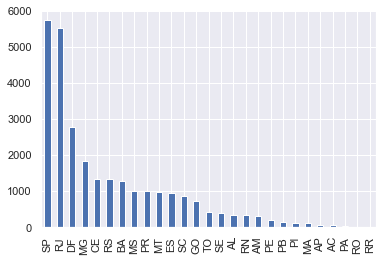

In [5]:
df['Estado'].value_counts().plot.bar()

<AxesSubplot:xlabel='Estado'>

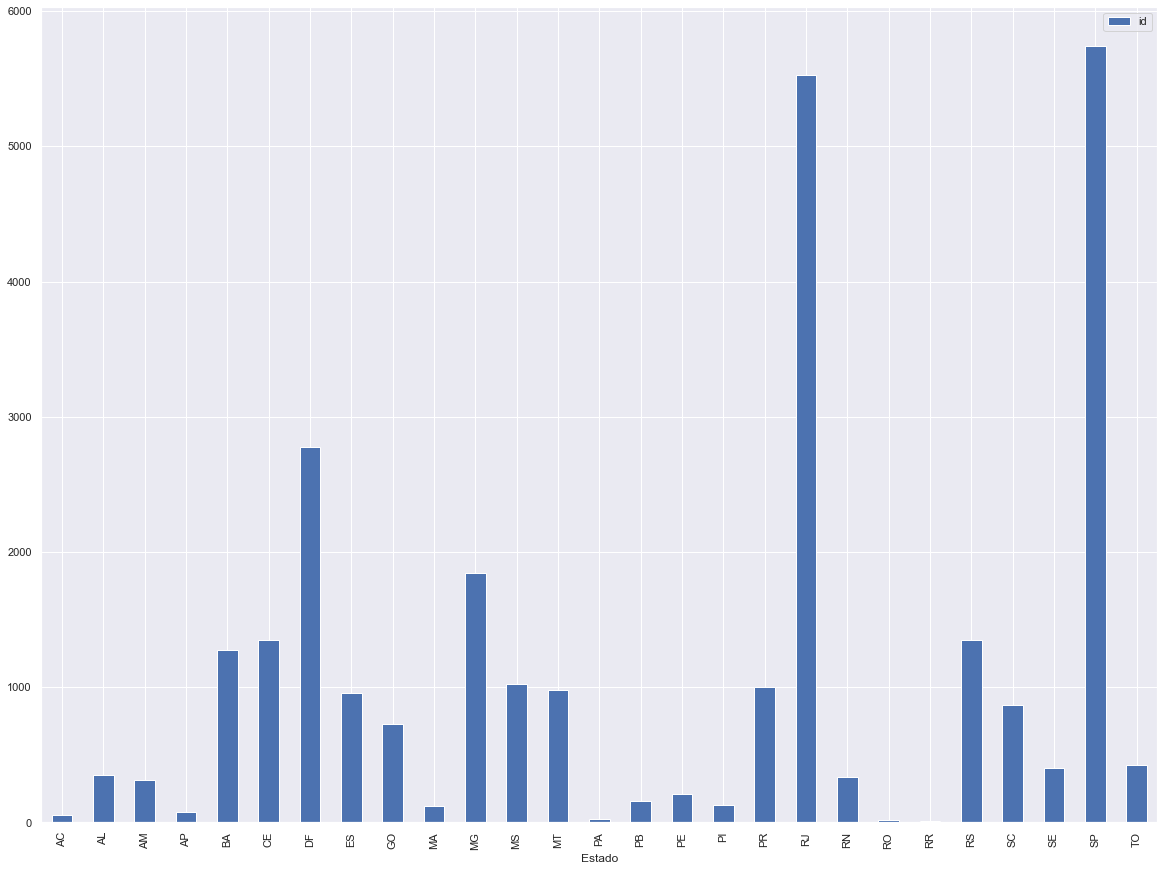

In [6]:
#dados = df.groupby(['Estado'])[['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07']].sum()

dados = df.groupby(['Estado'])[['id']].count()

dados.plot(kind = 'bar', figsize = (20,15))

## 4) Faça um gráfico de barras horizontais da soma dos ativos01 a ativos07
dica: pode usar df[['Ativo01','Ativo02','Ativo03','Ativo04','Ativo05','Ativo06','Ativo07']].sum()

Text(0.5, 1.0, 'Distribuição dos investimentos por Ativo')

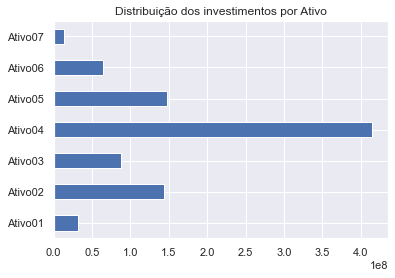

In [7]:
df[['Ativo01','Ativo02','Ativo03','Ativo04','Ativo05','Ativo06','Ativo07']].sum().plot.barh()
plt.title('Distribuição dos investimentos por Ativo')

## 5) Faça um gráfico para ver a distribuição dos valores do Ativo07 usando boxplot
Na mesma figura compare a distribuição do Ativo07 em cada estado


<AxesSubplot:xlabel='Ativo07', ylabel='Estado'>

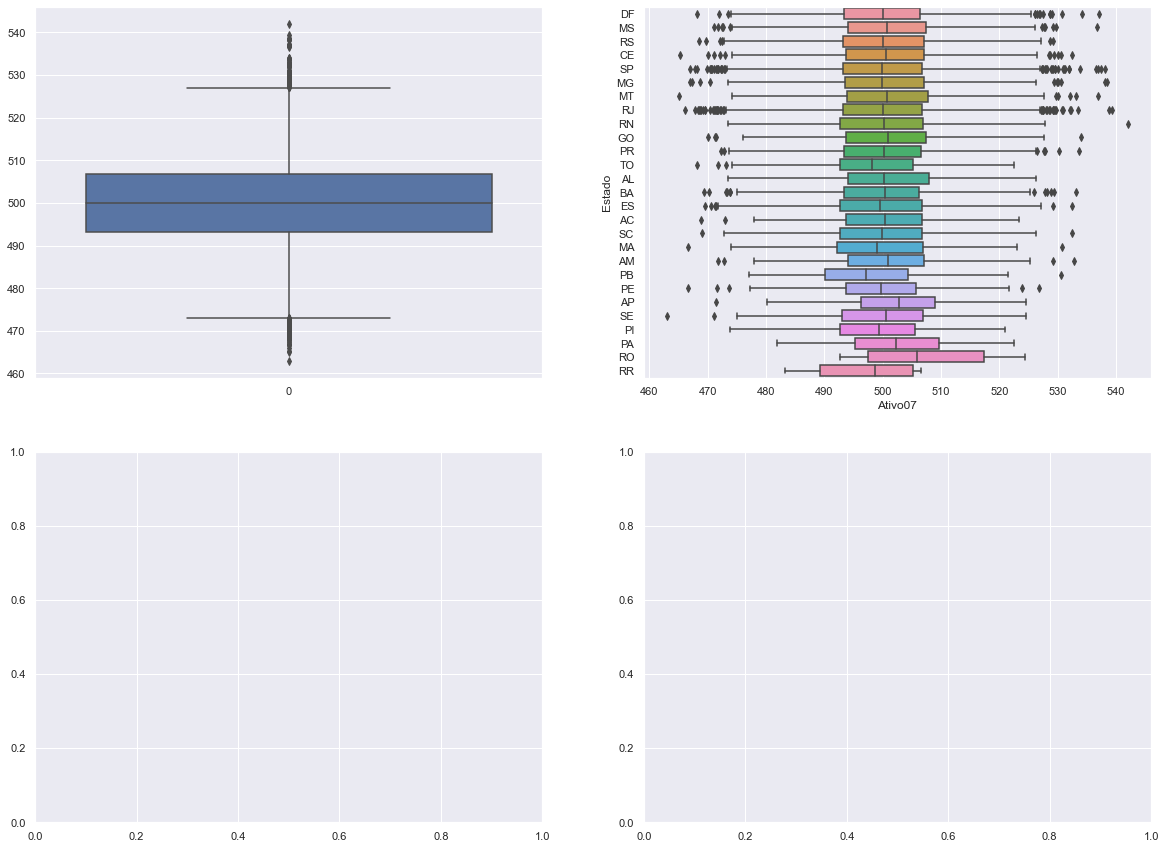

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(data = df['Ativo07'], ax = ax[0][0])

sns.boxplot(x = df['Ativo07'], y = df['Estado'], ax = ax[0][1])

## 6) Faça um gráfico de dispersão dos Ativo04 e Ativo07
Na mesma figura use cores para identificar o perfil

<AxesSubplot:xlabel='Ativo04', ylabel='Ativo07'>

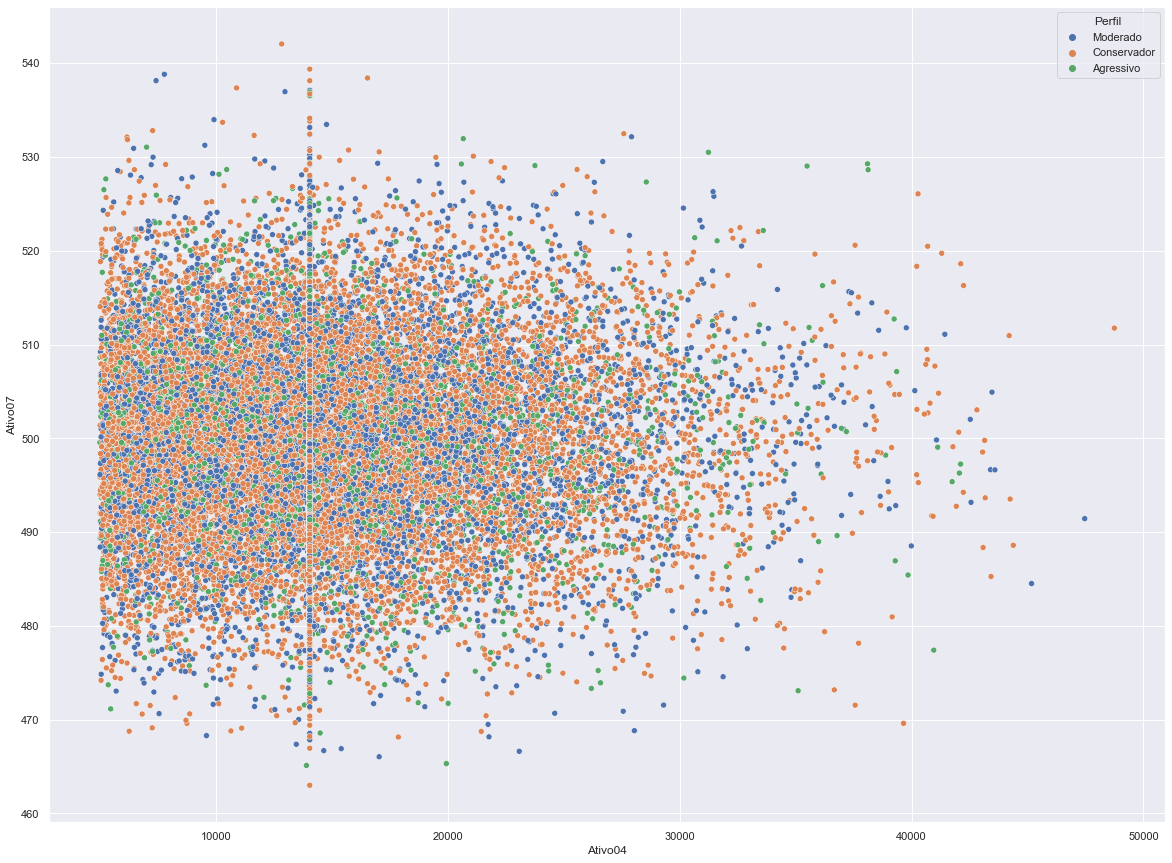

In [9]:
#fig, ax = plt.subplots(figsize=(20, 15))

plt.figure(figsize=(20, 15))
sns.scatterplot(data = df, x = 'Ativo04', y = 'Ativo07', hue = 'Perfil')

## 7) Faça um mapa de calor com a correlação entre Renda, Reserva, Investimentos a curto, médio e longo prazo
Coloque argumentos de anotação e use o cmap = 'plasma'  
dica: Use essa correlação - df[['Renda','Invest_curto_prazo','Invest_medio_prazo','Invest_longo_prazo', 'Reserva']].corr()

<AxesSubplot:>

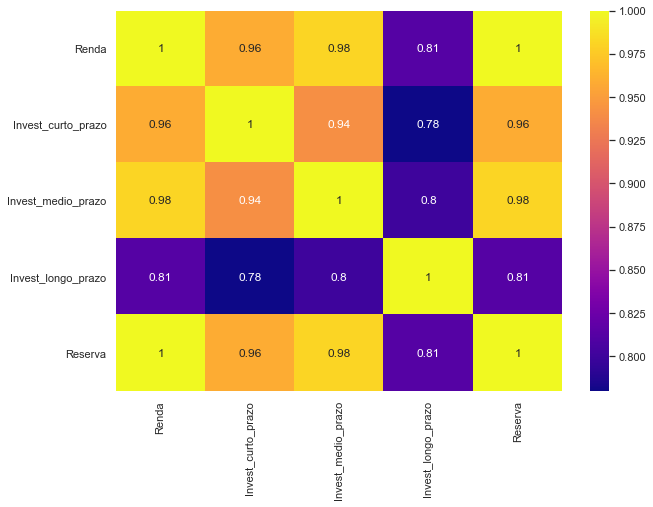

In [10]:
plt.figure(figsize=(10, 7))

sns.heatmap(df[['Renda','Invest_curto_prazo','Invest_medio_prazo','Invest_longo_prazo', 'Reserva']].corr(),\
            annot= True, cmap = 'plasma')

## 8) No gráfico de linhas abaixo, acrescente:
- Título: Total de investimento em cada ativo
- Mude o tamanho da figura
- Nome nos eixos
- Linha vermelha horizontal em 50000000
- Grade
- Rotacione os ticks do eixo x em 45º
- Mude os ticks do eixo y para azul
- Legenda no centro da figura

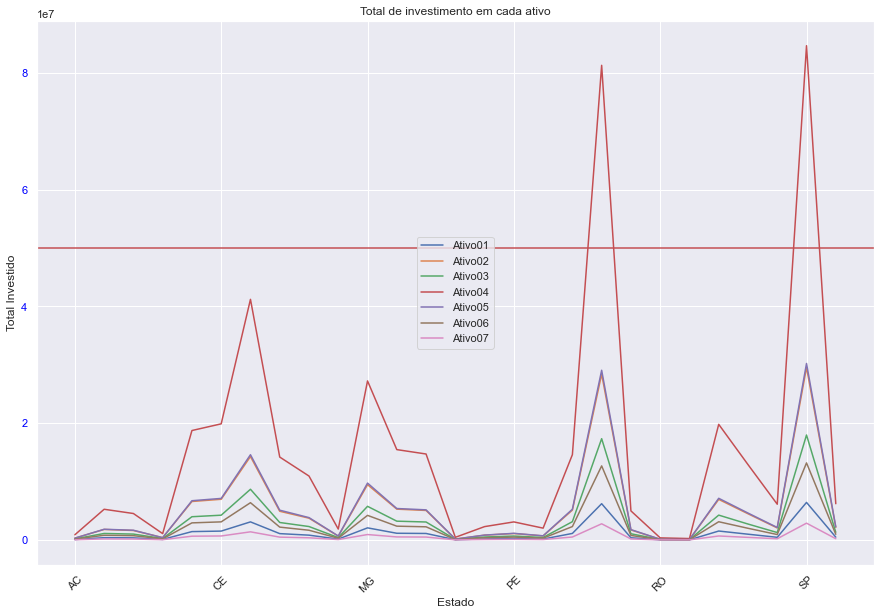

In [11]:
dados = df.groupby(['Estado'])[['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07']].sum()

dados.plot(title ='Total de investimento em cada ativo', figsize = (15,10), ylabel = 'Total Investido')

plt.axhline(50000000, color='r')
plt.xticks(rotation=45)
plt.yticks(color='blue')
plt.legend(loc='center')
plt.show()

# Bônus 1

Faça uma nuvem de palavras com a profissão dos investidores. Altere o tamanho, o fundo e personalize a figura

instalação:

`conda install -c conda-forge wordcloud`

código:

`from wordcloud import WordCloud
import matplotlib.pyplot as plt`

`text=','.join(df['Job'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()`

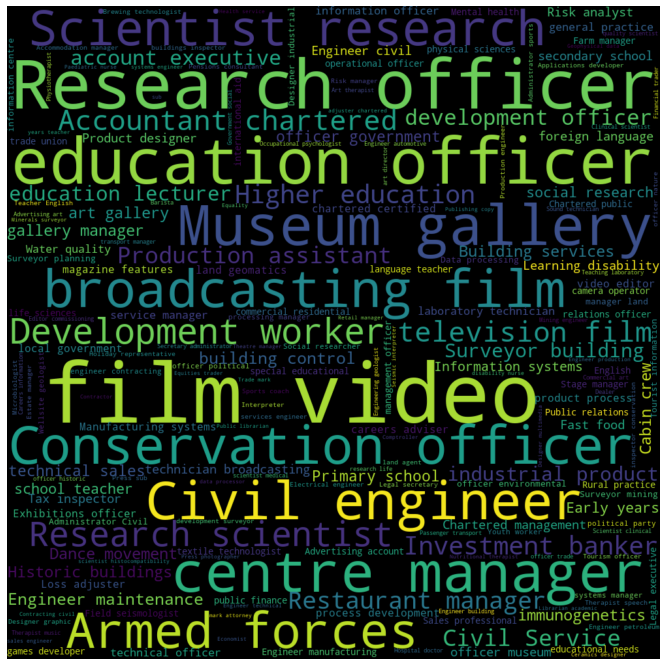

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ','.join(df['Job'])

wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(text)

plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

## Bônus 2

Usando técnica de machine learning chamada **kmeans**, divida os investidores em 5 grupos com relação ao que foi investido em cada ativo. Por exemplo, pessoas que tiveram investimentos parecidos em cada ativo, devem ficar no mesmo grupo. Para visualizar, use um gráfico de dispersão do ativo04 e ativo07 e acrescente os grupos usando cores.

O Kmeans é um algoritmo de machine learning não supervisionado que agrupa (cluster) de acordo com suas características


Podemos resumir o algoritmo nos seguintes passos:


- Step 1: Escolha o número de grupos (clusters) k 

- Step 2: Selecione k pontos aleatoriamente (chamados de centroides)

- step 3: Atribuir todos os pontos ao centróide do cluster mais próximo
Selecione um ponto e calcule a distância desse ponto a cada centróide. Ele fará parte do cluster com o centróide mais próximo. Faça isso com todos os pontos

- step 4: Recalcule o centróide com o grupo desses pontos

- Step 5: Repita o steps 3 e 4 até que nenhum ponto saia do grupo (cluster)

obs.: Para determinar o número de clusters, usamos a técnica da curva cotovelo

https://cartography-playground.gitlab.io/playgrounds/clustering-comparison/

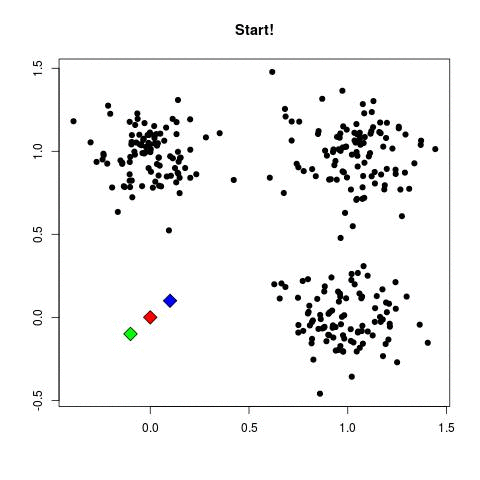

instalação  
`conda install -c conda-forge scikit-learn`

<AxesSubplot:xlabel='Ativo04', ylabel='Ativo07'>

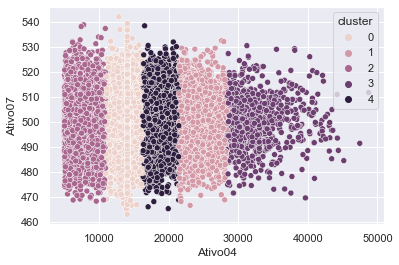

In [14]:
from sklearn.cluster import KMeans

X = df[['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

df['cluster'] = kmeans.labels_

sns.scatterplot(data=df, x='Ativo04', y='Ativo07', hue='cluster')

## Bônus 3
Com os dados BVSP que usamos nas aulas (https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Aula05/BVSP2.csv) , faça um gráfico candlestick dos últimos dias

`conda install -c conda-forge mplfinance`

Fonte para pesquisa:
https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh

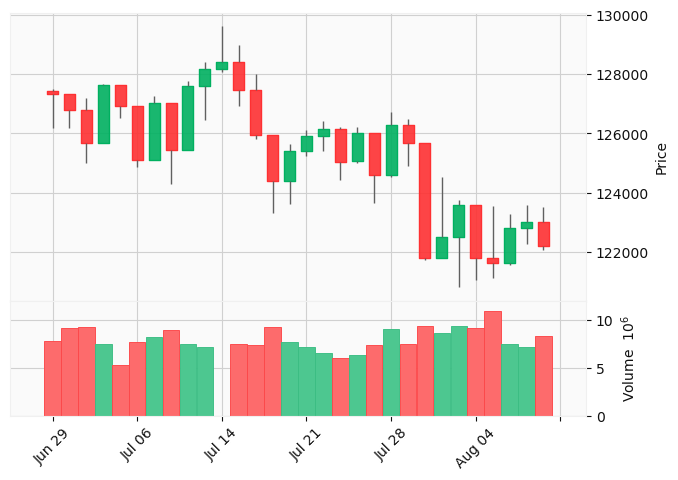

In [16]:
import mplfinance as mpf

ibov = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Aula05/BVSP2.csv')

ibov['Date'] = pd.to_datetime(ibov['Date']) # transformando em datetime
ibov = ibov.set_index('Date') # Formato DatetimeIndex, a data tem que estar no index
mpf.plot(ibov[-30:], type='candle', style='yahoo', volume=True) # ibov[-30:] usando os últimos 30 registros